In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

import iris
from eofs.iris import Eof

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0403).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations to molecules cm${^{-3}}$

In [264]:
data['o3_mole'] = data['o3']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*data['ps']/data['tas']*7.243*10**7*(10**9)
data['ch3o2_mole'] = data['ch3o2']*data['ps']/data['tas']*7.243*10**7*(10**9)/1.6227
data['ho2_mole'] = data['ho2']*data['ps']/data['tas']*7.243*10**7*(10**9)/1.1786
data['o1d_mole'] = data['o1d']*data['ps']/data['tas']*7.243*10**7*(10**9)/0.5714

data['k_ho2_ho2'] = 3.5*10**(-13)*np.exp(430/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 1.63*10**(-10)*np.exp(60/data['tas'])

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 9.5*10**(-14)*np.exp(390/data['tas'])

In [265]:
data['o3_mole'].mean()

663585735885.5164

In [266]:
data['o3prod_mole'].describe()

count    9.720000e+05
mean     1.449961e+06
std      3.511796e+06
min      1.471564e-08
25%      4.177122e+04
50%      2.724132e+05
75%      1.135750e+06
max      1.839511e+08
Name: o3prod_mole, dtype: float64

In [267]:
data['lossch4_mole'].describe()

count    9.720000e+05
mean     2.671724e+05
std      3.138944e+05
min      5.459778e-02
25%      1.764129e+04
50%      1.238389e+05
75%      4.682725e+05
max      2.739525e+06
Name: lossch4_mole, dtype: float64

In [268]:
data['lossco_mole'].describe()

count    9.720000e+05
mean     4.949081e+05
std      7.220968e+05
min      3.765106e-01
25%      4.822026e+04
50%      2.634963e+05
75%      7.106299e+05
max      4.839518e+07
Name: lossco_mole, dtype: float64

In [233]:
data['no_mole'].describe()

7438502765.733763

In [269]:
data['oh_mole'].describe()

count    9.720000e+05
mean     1.058698e+06
std      1.101868e+06
min      7.906739e-01
25%      1.255346e+05
50%      6.636913e+05
75%      1.787422e+06
max      9.102552e+06
Name: oh_mole, dtype: float64

In [270]:
data['ch3o2_mole'].describe()

count    9.720000e+05
mean     8.315586e+07
std      7.850867e+07
min      1.633785e+03
25%      1.719764e+07
50%      5.716522e+07
75%      1.336907e+08
max      3.511018e+08
Name: ch3o2_mole, dtype: float64

In [271]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     9.850579e+07
std      8.186555e+07
min      2.810981e+02
25%      2.223766e+07
50%      8.667198e+07
75%      1.588123e+08
max      6.368319e+08
Name: ho2_mole, dtype: float64

In [272]:
data['o1d_mole'].describe()

count    972000.000000
mean          0.013813
std           0.015349
min           0.000000
25%           0.001632
50%           0.010227
75%           0.020017
max           0.143203
Name: o1d_mole, dtype: float64

In [238]:
data['k_no_ch3o2'].mean()

8.53165841139419e-12

In [239]:
data['ratio_ch3o2_oh'] = data['ch3o2_mole']/data['oh_mole']
data['ratio_ch3o2_oh'].describe()

count    972000.000000
mean       3724.285025
std       18828.502218
min           0.115633
25%          41.346050
50%          80.169028
75%         154.876261
max      497409.863996
Name: ratio_ch3o2_oh, dtype: float64

In [240]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    972000.000000
mean        147.738575
std         185.334212
min           0.812606
25%          53.874238
50%          77.637505
75%         152.396658
max        3228.210451
Name: ratio_ho2_oh, dtype: float64

In [241]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    972000.000000
mean          0.693759
std          11.976469
min           0.042675
25%           0.223938
50%           0.272719
75%           0.398695
max        5654.675665
Name: P2_frac, dtype: float64

In [242]:
data['P2'].mean()

1012009.3950498564

In [243]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    972000.000000
mean          0.712520
std           3.923615
min           0.000598
25%           0.176880
50%           0.301093
75%           0.510885
max         918.345034
Name: P1_frac, dtype: float64

In [244]:
data['P1'].mean()

2993579.509152567

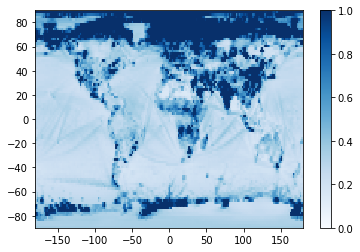

In [245]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [246]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    972000.000000
mean         -0.406279
std          15.265090
min       -6572.020699
25%           0.067448
50%           0.412074
75%           0.556958
max           0.811174
Name: P3_frac, dtype: float64

In [247]:
data['k_no_ro2'] = 2.54*10**(-12)*np.exp(360/data['tas'])
data['ro2_mole'] = data['P3']/data['k_no_ro2']/data['no_mole']
data['ro2_mole'].describe()

count    9.720000e+05
mean     8.462844e+07
std      1.215227e+08
min     -4.306621e+08
25%      1.054602e+06
50%      4.718400e+07
75%      1.500140e+08
max      1.041078e+09
Name: ro2_mole, dtype: float64

In [248]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [249]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [250]:
data['P4'] = data['k_o1d_h2o']*data['o1d_mole']*data['h2o_mole']
data['P4_frac'] = data['P4']/data['o3loss_mole']

In [251]:
data['P7'] = data['o3loss_mole'] - data['P4'] - data['P5'] - data['P6']
data['P7_frac'] = data['P7']/data['o3loss_mole']

In [252]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    972000.000000
mean          1.343871
std           0.978827
min           0.001444
25%           0.654435
50%           1.113432
75%           1.862781
max          11.088312
Name: ratio_P1_P2, dtype: float64

In [253]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          0.508235
std           0.622596
min           0.011310
25%           0.206688
50%           0.434999
75%           0.663030
max          38.982534
Name: ratio_P5_P6, dtype: float64

In [254]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].median()
P2_frac = data_land['P2_frac'].median()
P3_frac = data_land['P3_frac'].median()
P4_frac = data_land['P4_frac'].median()
P5_frac = data_land['P5_frac'].median()
P6_frac = data_land['P6_frac'].median()
P7_frac = data_land['P7_frac'].median()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [255]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P4 fraction:    "+str(np.round(P4_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P7 fraction:    "+str(np.round(P7_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.56
P2 fraction:    0.36
P3 fraction:    0.11
P4 fraction:    0.67
P5 fraction:    0.08
P6 fraction:    0.24
P7 fraction:    0.0
P1:P2 ratio:    1.95
P5:P6 ratio:    0.32
HO₂:OH ratio:   98.5
CH₃O₂:OH ratio: 51.7


In [256]:
data_land['P3_frac'].describe()

count    322140.000000
mean         -1.481781
std          25.743966
min       -6572.020699
25%          -0.882864
50%           0.105666
75%           0.414723
max           0.811174
Name: P3_frac, dtype: float64

In [257]:
data_land['P1_frac'].describe()

count    322140.000000
mean          1.460086
std           6.579876
min           0.000766
25%           0.341786
50%           0.555546
75%           1.244185
max         918.345034
Name: P1_frac, dtype: float64

In [258]:
data_land['P2_frac'].describe()

count    322140.000000
mean          1.021695
std          20.206514
min           0.042675
25%           0.229372
50%           0.356023
75%           0.582030
max        5654.675665
Name: P2_frac, dtype: float64

In [259]:
data_land['P4_frac'].describe()

count    322140.000000
mean          0.670515
std           0.483458
min           0.000000
25%           0.297480
50%           0.665337
75%           0.979779
max           6.522430
Name: P4_frac, dtype: float64

In [260]:
data_land['P5_frac'].describe()

count    322140.000000
mean          0.095293
std           0.073012
min           0.000369
25%           0.036410
50%           0.079704
75%           0.140150
max           0.899977
Name: P5_frac, dtype: float64

In [261]:
data_land['P6_frac'].describe()

count    322140.000000
mean          0.278054
std           0.174799
min           0.000158
25%           0.132800
50%           0.235552
75%           0.407616
max           0.780433
Name: P6_frac, dtype: float64

In [262]:
data_land['P7_frac'].describe()

count    322140.000000
mean         -0.043862
std           0.408357
min          -5.634990
25%          -0.283067
50%           0.002823
75%           0.253674
max           0.984531
Name: P7_frac, dtype: float64

In [263]:
#data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0404).csv', index = False)